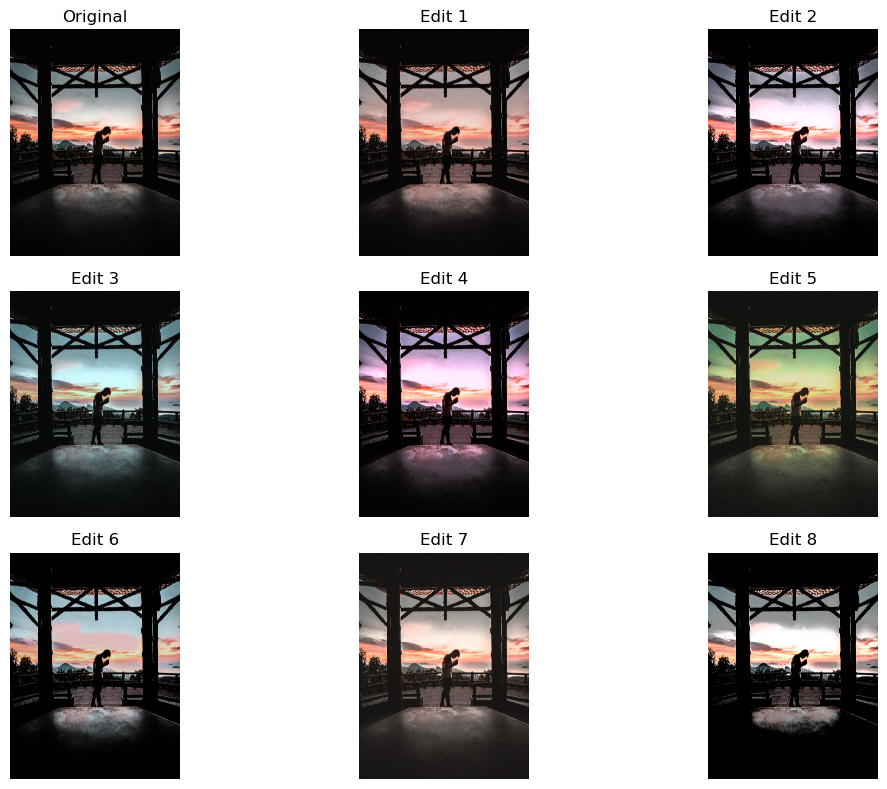

In [1]:
from editor.training import random_edit
from editor.visualisation import display_images
from editor.training import  HistogramDataset
from config import  DATA


dataset = HistogramDataset(DATA)
img = dataset.get_original_image(0)
print(img.size)

edits = {
    'Original': img
}
edits.update({
    f'Edit {i}': random_edit(img.copy(), seed=i)
    for i in range(1, 9)
})

display_images(edits)